# Presentation 1 Group 9 Analysis

- EV vehicles.
  
---

### Library Imports & File Loads 

In [20]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns


# File to Load - 
census_df = Path('Resources/census_data.csv')  # UPDATE http://www.ecdms.energy.ca.gov/elecbyCounty.aspx
vehicle_type_by_zipcode_2020 = Path('Resources/vehicle_type_by_zipcode_2020.csv')
vehicle_type_by_zipcode_2021 = Path('Resources/vehicle_type_by_zipcode_2021.csv')
vehicle_type_by_zipcode_2022 = Path('Resources/vehicle_type_by_zipcode_2022.csv')
#New_ZEV_Sales_df = Path('New_ZEV_Sales_Last_updated_01-31-2024_ada_zip_code.csv')

census_df = pd.read_csv(census_df)
vehicle_type_by_zipcode_2020 = pd.read_csv(vehicle_type_by_zipcode_2020, low_memory=False)
vehicle_type_by_zipcode_2021 = pd.read_csv(vehicle_type_by_zipcode_2021, low_memory=False)
vehicle_type_by_zipcode_2022 = pd.read_csv(vehicle_type_by_zipcode_2022, low_memory=False)
vehicle_type_by_zipcode_2020

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,1/1/2020,90001,2007,Gasoline,ACURA,Light,15
1,1/1/2020,90002,2007,Gasoline,ACURA,Light,20
2,1/1/2020,90003,2007,Gasoline,ACURA,Light,29
3,1/1/2020,90004,2007,Gasoline,ACURA,Light,19
4,1/1/2020,90006,2007,Gasoline,ACURA,Light,15
...,...,...,...,...,...,...,...
602389,1/1/2020,OOS,Unk,Gasoline,Unk,Heavy,98
602390,1/1/2020,90012,Unk,Gasoline,Unk,Light,12
602391,1/1/2020,93065,Unk,Gasoline,Unk,Light,11
602392,1/1/2020,95762,Unk,Gasoline,Unk,Light,12


In [21]:
vehicle_type_by_zipcode_2021

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,1/1/2021,90001,2008,Gasoline,ACURA,Light,12
1,1/1/2021,90003,2008,Gasoline,ACURA,Light,24
2,1/1/2021,90004,2008,Gasoline,ACURA,Light,20
3,1/1/2021,90005,2008,Gasoline,ACURA,Light,12
4,1/1/2021,90006,2008,Gasoline,ACURA,Light,15
...,...,...,...,...,...,...,...
677964,1/1/2021,96003,<2008,Gasoline,WORKHORSE,Heavy,22
677965,1/1/2021,96080,<2008,Gasoline,WORKHORSE,Heavy,11
677966,1/1/2021,96161,<2008,Gasoline,WORKHORSE,Heavy,12
677967,1/1/2021,OOS,<2008,Gasoline,WORKHORSE,Heavy,229


In [22]:
vehicle_type_by_zipcode_2022

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,1/1/2022,90000,2020,Gasoline,OTHER/UNK,Light,1
1,1/1/2022,90000,2022,Gasoline,OTHER/UNK,Light,1
2,1/1/2022,90000,<2008,Gasoline,OTHER/UNK,Heavy,22
3,1/1/2022,90000,<2008,Gasoline,OTHER/UNK,Light,20
4,1/1/2022,90000,<2008,Gasoline,OTHER/UNK,Unk,12
...,...,...,...,...,...,...,...
722460,1/1/2022,OOS,<2008,Flex-Fuel,CHRYSLER,Light,24
722461,1/1/2022,OOS,<2008,Flex-Fuel,CHRYSLER,Unk,26
722462,1/1/2022,OOS,<2008,Flex-Fuel,MAZDA,Light,14
722463,1/1/2022,OOS,<2008,Flex-Fuel,MERCURY,Light,20


### EV DATA 

In [23]:
battery_2020 = vehicle_type_by_zipcode_2020.loc[vehicle_type_by_zipcode_2020['Fuel'] == 'Battery Electric']
battery_2020 = battery_2020.drop(columns=['Model Year', 'Fuel', 'Make', 'Duty'])
battery_2020 = battery_2020[battery_2020['Zip Code'] != 'OOS']
battery_2020 = battery_2020.replace('1/1/2020', 2020)
battery_2020 = battery_2020.sort_values('Zip Code')
vehicle_count_2020 = battery_2020['Vehicles'].sum()
print('######################################')
print('EV count for 2020 is :', vehicle_count_2020)
print('######################################', '\n')
battery_2020

######################################
EV count for 2020 is : 302841
###################################### 



,Date,Zip Code,Vehicles
565720,2020,90000,4
442176,2020,90001,3
307116,2020,90001,1
483884,2020,90001,6
505993,2020,90001,2
...,...,...,...
399652,2020,98922,1
399653,2020,99205,1
399654,2020,99223,1
485315,2020,99502,1


In [24]:
battery_2021 = vehicle_type_by_zipcode_2021.loc[vehicle_type_by_zipcode_2021['Fuel'] == 'Battery Electric']
battery_2021 = battery_2021.drop(columns=['Model Year', 'Fuel', 'Make', 'Duty'])
battery_2021 = battery_2021[battery_2021['Zip Code'] != 'OOS']
battery_2021 = battery_2021.replace('1/1/2021', 2021)
battery_2021 = battery_2021.sort_values('Zip Code')
vehicle_count_2021 = battery_2021['Vehicles'].sum()
print('######################################')
print('EV count for 2021 is :', vehicle_count_2021)
print('######################################','\n')
battery_2021

######################################
EV count for 2021 is : 371134
###################################### 



,Date,Zip Code,Vehicles
248317,2021,90001,2
545279,2021,90001,13
156594,2021,90001,2
400089,2021,90001,3
348520,2021,90001,3
...,...,...,...
412381,2021,98922,1
412392,2021,99019,1
412394,2021,99021,1
462557,2021,99801,1


In [25]:
battery_2022 = vehicle_type_by_zipcode_2022.loc[vehicle_type_by_zipcode_2022['Fuel'] == 'Battery Electric']
battery_2022 = battery_2022.drop(columns=['Model Year', 'Fuel', 'Make', 'Duty'])
battery_2022 = battery_2022[battery_2022['Zip Code'] != 'OOS']
battery_2022 = battery_2022.replace('1/1/2022', 2022)
battery_2022 = battery_2022.sort_values('Zip Code')
vehicle_count_2022 = battery_2022['Vehicles'].sum()

print('######################################')
print('EV count for 2022 is :', vehicle_count_2022)
print('######################################','\n')
battery_2022


######################################
EV count for 2022 is : 520345
###################################### 



,Date,Zip Code,Vehicles
141,2022,90001,1
488,2022,90001,1
474,2022,90001,16
473,2022,90001,2
441,2022,90001,1
...,...,...,...
719552,2022,98584,1
719786,2022,98663,1
720105,2022,98944,1
720203,2022,99033,1


In [26]:
vehicle_total_count = vehicle_count_2020 + vehicle_count_2021 + vehicle_count_2022
print('######################################')
print('The total EV count for the three years is :', vehicle_total_count)
print('######################################','\n')

######################################
The total EV count for the three years is : 1194320
###################################### 



### CENSUS DATA 

In [27]:
# BEGIN CENSUS DATA 

census_df_2020 = census_df.loc[census_df['Year'] == 2020]
census_df_2021 = census_df.loc[census_df['Year'] == 2021]
census_df_2022 = census_df.loc[census_df['Year'] == 2022]
census_df_2020_2022 = census_df.loc[(census_df['Year'] == 2020) | (census_df['Year'] == 2021) | (census_df['Year'] == 2022)]

census_df_2020 = census_df_2020.rename(columns={'Zipcode': 'Zip Code'})
census_df_2021 = census_df_2021.rename(columns={'Zipcode': 'Zip Code'})
census_df_2022 = census_df_2022.rename(columns={'Zipcode': 'Zip Code'})
census_df_2020_2022 = census_df_2020_2022.rename(columns={'Zipcode': 'Zip Code'})

census_df_2020 = census_df_2020.drop(columns=['Population', 'state_abbr', 'state_fips', 'state', 'city'])
census_df_2021 = census_df_2021.drop(columns=['Population', 'state_abbr', 'state_fips', 'state', 'city'])
census_df_2022 = census_df_2022.drop(columns=['Population', 'state_abbr', 'state_fips', 'state', 'city'])
census_df_2020_2022 = census_df_2020_2022.drop(columns=['Population', 'state_abbr', 'state_fips', 'state', 'city'])

census_df_2020 = census_df_2020.rename(columns={'Zipcode': 'Zip Code'})
census_df_2021 = census_df_2021.rename(columns={'Zipcode': 'Zip Code'})
census_df_2022 = census_df_2022.rename(columns={'Zipcode': 'Zip Code'})
census_df_2020_2022 = census_df_2020_2022.rename(columns={'Zipcode': 'Zip Code'})

census_df_2020 = census_df_2020.rename(columns={'county': 'County'})
census_df_2021 = census_df_2021.rename(columns={'county': 'County'})
census_df_2022 = census_df_2022.rename(columns={'county': 'County'})
census_df_2020_2022 = census_df_2020_2022.rename(columns={'county': 'County'})

# Concatenate the DataFrames
census_df_2020_2022 = pd.concat([census_df_2020, census_df_2021, census_df_2022], ignore_index=True)
census_df_2020_2022.reset_index(drop=True, inplace=True)
census_df_2020_2022

,Zip Code,Household Income,Year,County
0,90001,48011.0,2020,Los Angeles
1,90002,42245.0,2020,Los Angeles
2,90003,42220.0,2020,Los Angeles
3,90004,52775.0,2020,Los Angeles
4,90005,42398.0,2020,Los Angeles
...,...,...,...,...
4285,96145,120714.0,2022,Placer
4286,96146,112500.0,2022,Placer
4287,96148,96786.0,2022,Placer
4288,96150,76980.0,2022,El Dorado


In [28]:
mean_2020 = census_df_2020['Household Income'].mean()
quartile_25_2020 = census_df_2020['Household Income'].quantile([0.25])
quartile_75_2020 = census_df_2020['Household Income'].quantile([0.75])
print('######################################')
#print('mean', mean_2020)
print('The 25% quartile of Household Income for 2020 is: ', quartile_25_2020)
print('The 75% quartile of Household Income for 2020 is: ', quartile_75_2020)
print('######################################','\n\n\n')
print('######################################')

mean_2021 = census_df_2021['Household Income'].mean()
quartile_25_2021 = census_df_2021['Household Income'].quantile([0.25])
quartile_75_2021 = census_df_2021['Household Income'].quantile([0.75])
#print('mean', mean_2021)
print('The 25% quartile of Household Income for 2021 is: ', quartile_25_2021)
print('The 75% quartile of Household Income for 2021 is: ', quartile_75_2021)
print('######################################','\n\n\n')
print('######################################')

mean_2022 = census_df_2022['Household Income'].mean()
quartile_25_2022 = census_df_2022['Household Income'].quantile([0.25])
quartile_75_2022 = census_df_2022['Household Income'].quantile([0.75])
#print('mean', mean_2022)
print('The 25% quartile of Household Income for 2022 is: ',quartile_25_2022)
print('The 75% quartile of Household Income for 2022 is: ',quartile_75_2022)
print('######################################','\n\n\n')


######################################
The 25% quartile of Household Income for 2020 is:  0.25    53870.75
Name: Household Income, dtype: float64
The 75% quartile of Household Income for 2020 is:  0.75    96681.0
Name: Household Income, dtype: float64
###################################### 



######################################
The 25% quartile of Household Income for 2021 is:  0.25    58177.0
Name: Household Income, dtype: float64
The 75% quartile of Household Income for 2021 is:  0.75    104462.75
Name: Household Income, dtype: float64
###################################### 



######################################
The 25% quartile of Household Income for 2022 is:  0.25    63959.75
Name: Household Income, dtype: float64
The 75% quartile of Household Income for 2022 is:  0.75    112068.0
Name: Household Income, dtype: float64
###################################### 





In [29]:
census_df_2020['Zip Code'] = census_df_2020['Zip Code'].apply(str)
census_df_2021['Zip Code'] = census_df_2021['Zip Code'].apply(str)
census_df_2022['Zip Code'] = census_df_2022['Zip Code'].apply(str)
#census_df_2020_2022['Zip Code'] = census_df_2020_2022['Zip Code'].apply(str)

merge_2020 = pd.merge(census_df_2020, battery_2020, how='left', on=['Zip Code'], sort=True)
merge_2021 = pd.merge(census_df_2021, battery_2021, how='left', on=['Zip Code'], sort=True)
merge_2022 = pd.merge(census_df_2022, battery_2022, how='left', on=['Zip Code'], sort=True)
#merge_2020_2022 = pd.merge(census_df_2020_2022, battery_2020_2022, how='left', on=['Zip Code'], sort=True)

merge_2020 = merge_2020.dropna(subset=['Date', 'Vehicles'])
merge_2021 = merge_2021.dropna(subset=['Date', 'Vehicles'])
merge_2022 = merge_2022.dropna(subset=['Date', 'Vehicles'])
#merge_2020_2022 = merge_2020_2022.dropna(subset=['Date', 'Vehicles'])

merge_vehicle_count_2020 = merge_2020['Vehicles'].sum()
merge_vehicle_count_2021 = merge_2021['Vehicles'].sum()
merge_vehicle_count_2022 = merge_2022['Vehicles'].sum()
merge_vehicle_total_count = merge_vehicle_count_2020 + merge_vehicle_count_2021 + merge_vehicle_count_2022

print('######################################')
print('The total vehicle count after merge for 2020 is ', merge_vehicle_count_2020)
print('The total vehicle count after merge for 2021 is ', merge_vehicle_count_2021)
print('The total vehicle count after merge for 2022 is ', merge_vehicle_count_2022)
print('The total vehicle count after merge for all years is ', merge_vehicle_total_count)
print('######################################','\n\n\n')


######################################
The total vehicle count after merge for 2020 is  274385.0
The total vehicle count after merge for 2021 is  335157.0
The total vehicle count after merge for 2022 is  468753.0
The total vehicle count after merge for all years is  1078295.0
###################################### 





In [30]:
total_vehicle_count_by_zipcode_2020_df = merge_2020.groupby(['Zip Code', 'Household Income', 'County'], as_index=False, sort=True)['Vehicles'].sum()
total_vehicle_count_by_zipcode_2020_df

,Zip Code,Household Income,County,Vehicles
0,90001,48011.0,Los Angeles,21.0
1,90002,42245.0,Los Angeles,31.0
2,90003,42220.0,Los Angeles,25.0
3,90004,52775.0,Los Angeles,345.0
4,90005,42398.0,Los Angeles,116.0
...,...,...,...,...
1321,96145,84648.0,Placer,23.0
1322,96146,78409.0,Placer,12.0
1323,96148,81833.0,Placer,3.0
1324,96150,62541.0,El Dorado,36.0


In [31]:
total_vehicle_count_by_zipcode_2021_df = merge_2021.groupby(['Zip Code', 'Household Income', 'County'], as_index=False, sort=True)['Vehicles'].sum()
total_vehicle_count_by_zipcode_2021_df

,Zip Code,Household Income,County,Vehicles
0,90001,52806.0,Los Angeles,36.0
1,90002,46159.0,Los Angeles,37.0
2,90003,47733.0,Los Angeles,30.0
3,90004,54947.0,Los Angeles,439.0
4,90005,44913.0,Los Angeles,169.0
...,...,...,...,...
1338,96145,117150.0,Placer,32.0
1339,96146,85938.0,Placer,14.0
1340,96148,84866.0,Placer,5.0
1341,96150,68082.0,El Dorado,66.0


In [32]:
total_vehicle_count_by_zipcode_2022_df = merge_2022.groupby(['Zip Code', 'Household Income', 'County'], as_index=False, sort=True)['Vehicles'].sum()
total_vehicle_count_by_zipcode_2022_df


,Zip Code,Household Income,County,Vehicles
0,90001,57698.0,Los Angeles,52.0
1,90002,54221.0,Los Angeles,60.0
2,90003,51275.0,Los Angeles,63.0
3,90004,58420.0,Los Angeles,643.0
4,90005,49226.0,Los Angeles,286.0
...,...,...,...,...
1365,96145,120714.0,Placer,50.0
1366,96146,112500.0,Placer,19.0
1367,96148,96786.0,Placer,9.0
1368,96150,76980.0,El Dorado,106.0


In [33]:
total_vehicle_count_by_zipcode_2022_df = merge_2022.groupby(['Zip Code', 'Household Income', 'County'], as_index=False, sort=True)['Vehicles'].sum()
total_vehicle_count_by_zipcode_2022_df


,Zip Code,Household Income,County,Vehicles
0,90001,57698.0,Los Angeles,52.0
1,90002,54221.0,Los Angeles,60.0
2,90003,51275.0,Los Angeles,63.0
3,90004,58420.0,Los Angeles,643.0
4,90005,49226.0,Los Angeles,286.0
...,...,...,...,...
1365,96145,120714.0,Placer,50.0
1366,96146,112500.0,Placer,19.0
1367,96148,96786.0,Placer,9.0
1368,96150,76980.0,El Dorado,106.0


In [34]:

# census_df_2022_75 = census_df_2022.loc[(census_df_2022['Household Income'] > int(quartile_75_2022))]
total_vehicle_count_df_2020_75 = total_vehicle_count_by_zipcode_2020_df.loc[(total_vehicle_count_by_zipcode_2020_df['Household Income'] > int(quartile_75_2020))]
total_vehicle_count_df_2020_25 = total_vehicle_count_by_zipcode_2020_df.loc[(total_vehicle_count_by_zipcode_2020_df['Household Income'] < int(quartile_25_2020))]

total_vehicle_count_df_2021_75 = total_vehicle_count_by_zipcode_2021_df.loc[(total_vehicle_count_by_zipcode_2021_df['Household Income'] > int(quartile_75_2021))]
total_vehicle_count_df_2021_25 = total_vehicle_count_by_zipcode_2021_df.loc[(total_vehicle_count_by_zipcode_2021_df['Household Income'] < int(quartile_25_2021))]

total_vehicle_count_df_2022_75 = total_vehicle_count_by_zipcode_2022_df.loc[(total_vehicle_count_by_zipcode_2022_df['Household Income'] > int(quartile_75_2022))]
total_vehicle_count_df_2022_25 = total_vehicle_count_by_zipcode_2022_df.loc[(total_vehicle_count_by_zipcode_2022_df['Household Income'] < int(quartile_25_2022))]

total_vehicle_count_df_2020_75.reset_index(drop=True, inplace=True)
total_vehicle_count_df_2020_25.reset_index(drop=True, inplace=True)
total_vehicle_count_df_2021_75.reset_index(drop=True, inplace=True)
total_vehicle_count_df_2021_25.reset_index(drop=True, inplace=True)
total_vehicle_count_df_2022_75.reset_index(drop=True, inplace=True)
total_vehicle_count_df_2022_25.reset_index(drop=True, inplace=True)

total_vehicle_count_df_2020_75


C:\Users\jhaug\AppData\Local\Temp\ipykernel_16752\3097459428.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  total_vehicle_count_df_2020_75 = total_vehicle_count_by_zipcode_2020_df.loc[(total_vehicle_count_by_zipcode_2020_df['Household Income'] > int(quartile_75_2020))]
C:\Users\jhaug\AppData\Local\Temp\ipykernel_16752\3097459428.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  total_vehicle_count_df_2020_25 = total_vehicle_count_by_zipcode_2020_df.loc[(total_vehicle_count_by_zipcode_2020_df['Household Income'] < int(quartile_25_2020))]
C:\Users\jhaug\AppData\Local\Temp\ipykernel_16752\3097459428.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  total_vehicle_count_df_2021_75 = total_vehicle_count

,Zip Code,Household Income,County,Vehicles
0,90025,97791.0,Los Angeles,644.0
1,90035,99367.0,Los Angeles,302.0
2,90045,110535.0,Los Angeles,573.0
3,90049,133032.0,Los Angeles,1217.0
4,90064,103045.0,Los Angeles,629.0
...,...,...,...,...
350,95835,104404.0,Sacramento,280.0
351,95837,145833.0,Sacramento,14.0
352,95864,107115.0,Sacramento,269.0
353,96073,101576.0,Shasta,11.0


In [35]:
total_vehicle_count_df_2020_25


,Zip Code,Household Income,County,Vehicles
0,90001,48011.0,Los Angeles,21.0
1,90002,42245.0,Los Angeles,31.0
2,90003,42220.0,Los Angeles,25.0
3,90004,52775.0,Los Angeles,345.0
4,90005,42398.0,Los Angeles,116.0
...,...,...,...,...
279,96117,53125.0,Lassen,1.0
280,96122,49167.0,Plumas,1.0
281,96134,44550.0,Siskiyou,1.0
282,96137,47697.0,Lassen,2.0


In [36]:
total_vehicle_count_df_2021_75


,Zip Code,Household Income,County,Vehicles
0,90045,115943.0,Los Angeles,731.0
1,90049,143000.0,Los Angeles,1484.0
2,90056,105744.0,Los Angeles,157.0
3,90064,109357.0,Los Angeles,763.0
4,90067,109704.0,Los Angeles,267.0
...,...,...,...,...
351,96073,106888.0,Shasta,15.0
352,96140,113750.0,Placer,13.0
353,96141,115104.0,Placer,1.0
354,96145,117150.0,Placer,32.0


In [37]:
total_vehicle_count_df_2021_25


,Zip Code,Household Income,County,Vehicles
0,90001,52806.0,Los Angeles,36.0
1,90002,46159.0,Los Angeles,37.0
2,90003,47733.0,Los Angeles,30.0
3,90004,54947.0,Los Angeles,439.0
4,90005,44913.0,Los Angeles,169.0
...,...,...,...,...
294,96117,57366.0,Lassen,1.0
295,96122,50155.0,Plumas,2.0
296,96134,44924.0,Siskiyou,1.0
297,96137,49759.0,Lassen,4.0


In [38]:
total_vehicle_count_df_2022_75

,Zip Code,Household Income,County,Vehicles
0,90045,125692.0,Los Angeles,1122.0
1,90049,161605.0,Los Angeles,1956.0
2,90056,123457.0,Los Angeles,221.0
3,90064,123929.0,Los Angeles,1076.0
4,90067,125995.0,Los Angeles,320.0
...,...,...,...,...
351,96140,129063.0,Placer,16.0
352,96141,127045.0,Placer,2.0
353,96145,120714.0,Placer,50.0
354,96146,112500.0,Placer,19.0


In [39]:
total_vehicle_count_df_2022_25


,Zip Code,Household Income,County,Vehicles
0,90001,57698.0,Los Angeles,52.0
1,90002,54221.0,Los Angeles,60.0
2,90003,51275.0,Los Angeles,63.0
3,90004,58420.0,Los Angeles,643.0
4,90005,49226.0,Los Angeles,286.0
...,...,...,...,...
307,96107,43800.0,Mono,2.0
308,96122,53764.0,Plumas,9.0
309,96134,49327.0,Siskiyou,2.0
310,96137,59280.0,Lassen,7.0


In [40]:

vehicle_count_by_county_df_2020_75 = total_vehicle_count_df_2020_75.groupby(['County'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2020_25 = total_vehicle_count_df_2020_25.groupby(['County'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2021_75 = total_vehicle_count_df_2021_75.groupby(['County'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2021_25 = total_vehicle_count_df_2021_25.groupby(['County'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2022_75 = total_vehicle_count_df_2022_75.groupby(['County'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2022_25 = total_vehicle_count_df_2022_25.groupby(['County'], as_index=False, sort=True)['Vehicles'].sum()

print('######################################')
print('vehicle_count_by_county_df_2020_75')
print(vehicle_count_by_county_df_2020_75)
print('######################################','\n\n\n')

print('######################################')
print('vehicle_count_by_county_df_2020_25')
print(vehicle_count_by_county_df_2020_25)
print('######################################','\n\n\n')

print('######################################')
print('vehicle_count_by_county_df_2021_75')
print(vehicle_count_by_county_df_2021_75)
print('######################################','\n\n\n')

print('######################################')
print('vehicle_count_by_county_df_2021_25')
print(vehicle_count_by_county_df_2021_25)
print('######################################','\n\n\n')

print('######################################')
print('vehicle_count_by_county_df_2022_75')
print(vehicle_count_by_county_df_2022_75)
print('######################################','\n\n\n')

print('######################################')
print('vehicle_count_by_county_df_2022_25')
print(vehicle_count_by_county_df_2022_25)
print('######################################','\n\n\n')



######################################
vehicle_count_by_county_df_2020_75
             County  Vehicles
0           Alameda   21289.0
1         Calaveras       4.0
2      Contra Costa    8621.0
3         El Dorado     797.0
4            Fresno     274.0
5              Kern     140.0
6       Los Angeles   28629.0
7             Marin    4853.0
8         Mendocino       4.0
9            Merced       3.0
10         Monterey     575.0
11             Napa     645.0
12           Nevada      97.0
13           Orange   16224.0
14           Placer    1455.0
15        Riverside    1252.0
16       Sacramento    2383.0
17       San Benito       3.0
18   San Bernardino    2001.0
19        San Diego   13229.0
20    San Francisco    7086.0
21      San Joaquin      99.0
22  San Luis Obispo      67.0
23        San Mateo   15734.0
24    Santa Barbara    1226.0
25      Santa Clara   42419.0
26       Santa Cruz     937.0
27           Shasta      11.0
28           Solano     530.0
29           Sonoma     29

In [41]:

vehicle_count_in_state_df_2020_75 = vehicle_count_by_county_df_2020_75['Vehicles'].sum()
vehicle_count_in_state_df_2020_25 = vehicle_count_by_county_df_2020_25['Vehicles'].sum()
vehicle_count_in_state_df_2021_75 = vehicle_count_by_county_df_2021_75['Vehicles'].sum()
vehicle_count_in_state_df_2021_25 = vehicle_count_by_county_df_2021_25['Vehicles'].sum()
vehicle_count_in_state_df_2022_75 = vehicle_count_by_county_df_2022_75['Vehicles'].sum()
vehicle_count_in_state_df_2022_25 = vehicle_count_by_county_df_2022_25['Vehicles'].sum()

print('######################################')
print('vehicle_count_in_state_df_2020_75')
print(vehicle_count_in_state_df_2020_75)
print('######################################','\n\n\n')

print('######################################')
print('vehicle_count_in_state_df_2020_25')
print(vehicle_count_in_state_df_2020_25)
print('######################################','\n\n\n')

print('######################################')
print('vehicle_count_in_state_df_2021_75')
print(vehicle_count_in_state_df_2021_75)
print('######################################','\n\n\n')

print('######################################')
print('vehicle_count_in_state_df_2021_25')
print(vehicle_count_in_state_df_2021_25)
print('######################################','\n\n\n')

print('######################################')
print('vehicle_count_in_state_df_2022_75')
print(vehicle_count_in_state_df_2022_75)
print('######################################','\n\n\n')

print('######################################')
print('vehicle_count_in_state_df_2022_25')
print(vehicle_count_in_state_df_2022_25)
print('######################################','\n\n\n')



######################################
vehicle_count_in_state_df_2020_75
174336.0
###################################### 



######################################
vehicle_count_in_state_df_2020_25
9628.0
###################################### 



######################################
vehicle_count_in_state_df_2021_75
201606.0
###################################### 



######################################
vehicle_count_in_state_df_2021_25
13227.0
###################################### 



######################################
vehicle_count_in_state_df_2022_75
268235.0
###################################### 



######################################
vehicle_count_in_state_df_2022_25
20457.0
###################################### 





In [42]:

total_vehicles_in_state_middle_income_2020 = merge_vehicle_count_2020 - vehicle_count_in_state_df_2020_75 - vehicle_count_in_state_df_2020_25
total_vehicles_in_state_middle_income_2021 = merge_vehicle_count_2021 - vehicle_count_in_state_df_2021_75 - vehicle_count_in_state_df_2021_25
total_vehicles_in_state_middle_income_2022 = merge_vehicle_count_2022 - vehicle_count_in_state_df_2022_75 - vehicle_count_in_state_df_2022_25
total_vehicles_in_state_middle_lower_income_2020 = total_vehicles_in_state_middle_income_2020 + vehicle_count_in_state_df_2020_25
total_vehicles_in_state_middle_lower_income_2021 = total_vehicles_in_state_middle_income_2021 + vehicle_count_in_state_df_2021_25
total_vehicles_in_state_middle_lower_income_2022 = total_vehicles_in_state_middle_income_2022 + vehicle_count_in_state_df_2022_25

print('######################################')
print('total_vehicles_in_state_middle_income_2020')
print(total_vehicles_in_state_middle_income_2020)
print('######################################','\n\n\n')


print('######################################')
print('total_vehicles_in_state_middle_income_2021')
print(total_vehicles_in_state_middle_income_2021)
print('######################################','\n\n\n')


print('######################################')
print('total_vehicles_in_state_middle_income_2022')
print(total_vehicles_in_state_middle_income_2022)
print('######################################','\n\n\n')

year = ['2020','2021','2022']

state_income_level_counts_df = [['2020',  vehicle_count_in_state_df_2020_75, total_vehicles_in_state_middle_income_2020, vehicle_count_in_state_df_2020_25],
        ['2021', vehicle_count_in_state_df_2021_75, total_vehicles_in_state_middle_income_2021, vehicle_count_in_state_df_2021_25],
        ['2022', vehicle_count_in_state_df_2022_75, total_vehicles_in_state_middle_income_2022, vehicle_count_in_state_df_2022_25]]


state_income_level_counts_df = pd.DataFrame(state_income_level_counts_df, columns=['Year', 'Upper','Middle','Lower'])
state_income_level_counts_df.set_index('Year', inplace=True)
state_income_level_counts_df 


######################################
total_vehicles_in_state_middle_income_2020
90421.0
###################################### 



######################################
total_vehicles_in_state_middle_income_2021
120324.0
###################################### 



######################################
total_vehicles_in_state_middle_income_2022
180061.0
###################################### 





,Upper,Middle,Lower
Year,,,
2020,174336.0,90421.0,9628.0
2021,201606.0,120324.0,13227.0
2022,268235.0,180061.0,20457.0


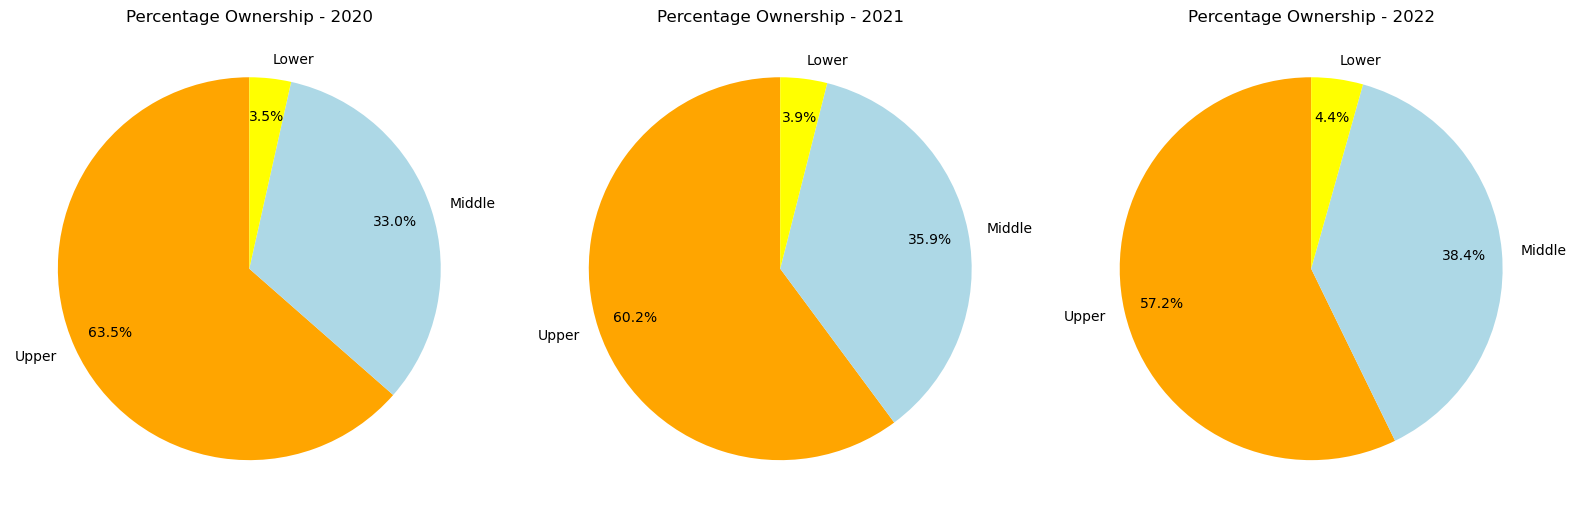

In [43]:

income_level_labels = [
    'Upper Income', 'Middle Income', 'Lower Income'
]

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(16,16))

for i, year in enumerate(state_income_level_counts_df.index):
    state_income_level_counts_df.loc[year].plot.pie(ax=axes[i], colors=['orange', 'lightblue', 'yellow'], autopct='%.1f%%', pctdistance=.8, startangle=90)
    axes[i].set_title(f'Percentage Ownership - {year}')
    axes[i].set(ylabel="")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [44]:
state_income_level_counts__upper_lower_combined_df = [['2020',  vehicle_count_in_state_df_2020_75, total_vehicles_in_state_middle_lower_income_2020],
        ['2021', vehicle_count_in_state_df_2021_75, total_vehicles_in_state_middle_lower_income_2021],
        ['2022', vehicle_count_in_state_df_2022_75, total_vehicles_in_state_middle_lower_income_2022]]


state_income_level_counts__upper_lower_combined_df = pd.DataFrame(state_income_level_counts__upper_lower_combined_df, columns=['Year', 'Upper','Middle & Lower'])
state_income_level_counts__upper_lower_combined_df.set_index('Year', inplace=True)
state_income_level_counts__upper_lower_combined_df 

,Upper,Middle & Lower
Year,,
2020,174336.0,100049.0
2021,201606.0,133551.0
2022,268235.0,200518.0


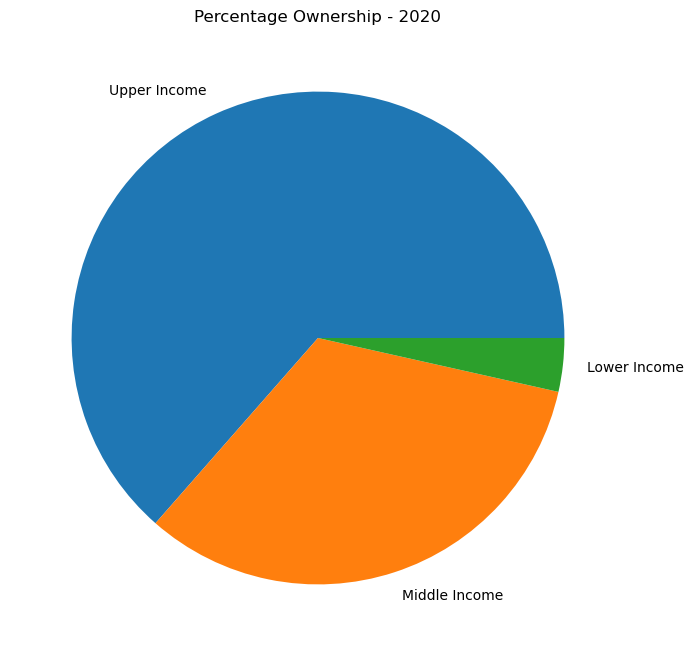

In [45]:

income_level_labels = [
    'Upper Income', 'Middle Income', 'Lower Income'
]

income_levels_split_2020 = [
    vehicle_count_in_state_df_2020_75, total_vehicles_in_state_middle_income_2020, vehicle_count_in_state_df_2020_25
]

plt.figure(figsize=(8,8))
plt.pie(x=income_levels_split_2020, labels=income_level_labels)
plt.title(f'Percentage Ownership - {2020}')
plt.show()



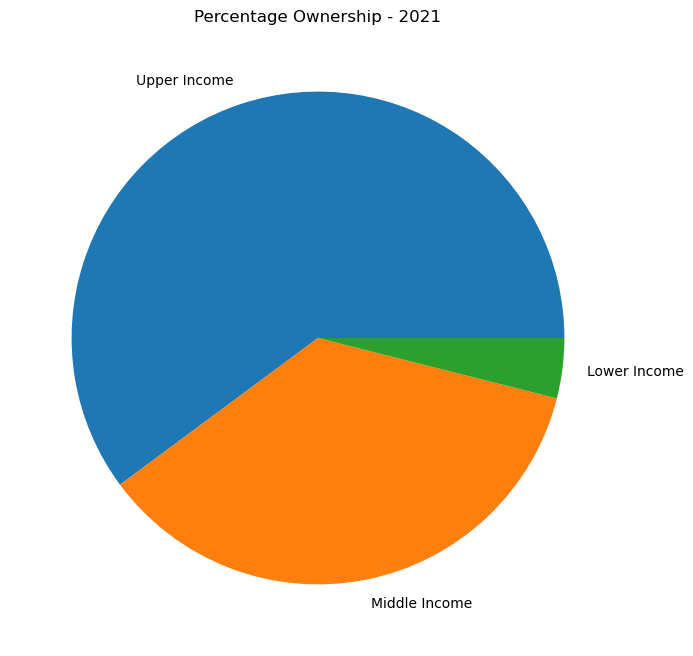

In [46]:

income_level_labels = [
    'Upper Income', 'Middle Income', 'Lower Income'
]

income_levels_split_2021 = [
    vehicle_count_in_state_df_2021_75, total_vehicles_in_state_middle_income_2021, vehicle_count_in_state_df_2021_25
]

plt.figure(figsize=(8,8))
plt.pie(x=income_levels_split_2021, labels=income_level_labels)
plt.title(f'Percentage Ownership - {2021}')
plt.show()




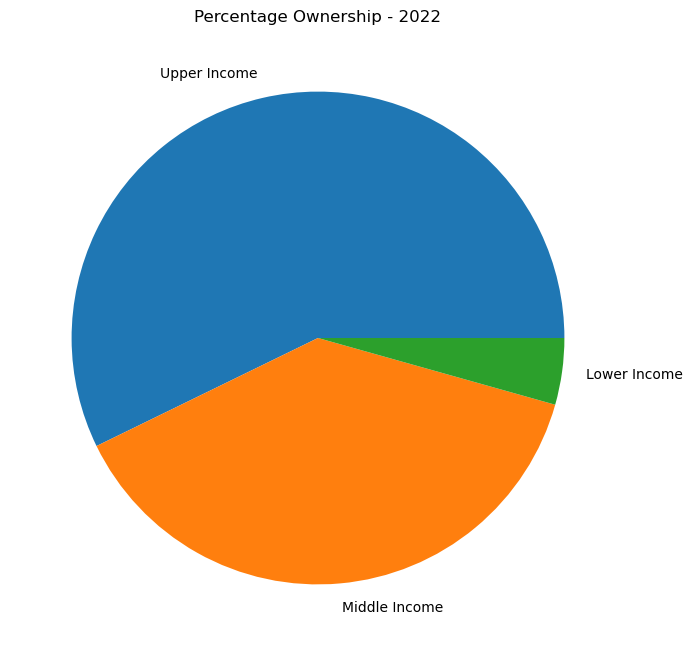

In [47]:

income_level_labels = [
    'Upper Income', 'Middle Income', 'Lower Income'
]

income_levels_split_2022 = [
    vehicle_count_in_state_df_2022_75, total_vehicles_in_state_middle_income_2022, vehicle_count_in_state_df_2022_25
]

plt.figure(figsize=(8,8))
plt.pie(x=income_levels_split_2022, labels=income_level_labels)
plt.title(f'Percentage Ownership - {2022}')
plt.show()




In [48]:

vehicle_count_by_county_df_2020_75 = total_vehicle_count_df_2020_75.groupby(['County', 'Zip Code'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2020_25 = total_vehicle_count_df_2020_25.groupby(['County', 'Zip Code'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2021_75 = total_vehicle_count_df_2021_75.groupby(['County', 'Zip Code'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2021_25 = total_vehicle_count_df_2021_25.groupby(['County', 'Zip Code'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2022_75 = total_vehicle_count_df_2022_75.groupby(['County', 'Zip Code'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2022_25 = total_vehicle_count_df_2022_25.groupby(['County', 'Zip Code'], as_index=False, sort=True)['Vehicles'].sum()

print('######################################')
print('vehicle_count_by_county_df_2020_75')
print(vehicle_count_by_county_df_2020_75)
print('######################################','\n\n\n')

print('######################################')
print('vehicle_count_by_county_df_2020_25')
print(vehicle_count_by_county_df_2020_25)
print('######################################','\n\n\n')

print('######################################')
print('vehicle_count_by_county_df_2021_75')
print(vehicle_count_by_county_df_2021_75)
print('######################################','\n\n\n')

print('######################################')
print('vehicle_count_by_county_df_2021_25')
print(vehicle_count_by_county_df_2021_25)
print('######################################','\n\n\n')

print('######################################')
print('vehicle_count_by_county_df_2022_75')
print(vehicle_count_by_county_df_2022_75)
print('######################################','\n\n\n')

print('######################################')
print('vehicle_count_by_county_df_2022_25')
print(vehicle_count_by_county_df_2022_25)
print('######################################','\n\n\n')


######################################
vehicle_count_by_county_df_2020_75
      County Zip Code  Vehicles
0    Alameda    94502     304.0
1    Alameda    94536    1623.0
2    Alameda    94538    2035.0
3    Alameda    94539    2902.0
4    Alameda    94542     299.0
..       ...      ...       ...
350  Ventura    93022      38.0
351  Ventura    93065     566.0
352  Ventura    93066      45.0
353     Yolo    95612       2.0
354     Yolo    95618     369.0

[355 rows x 3 columns]
###################################### 



######################################
vehicle_count_by_county_df_2020_25
       County Zip Code  Vehicles
0     Alameda    94601     122.0
1     Alameda    94621      59.0
2     Alameda    94704      88.0
3       Butte    95926      81.0
4       Butte    95954       3.0
..        ...      ...       ...
279    Tulare    93647       2.0
280  Tuolumne    95310       6.0
281  Tuolumne    95327       9.0
282      Yolo    95645       3.0
283      Yuba    95903       4.0

[284

In [49]:


neighborhood_count_in_county_df_2020_75 = total_vehicle_count_df_2020_75['County'].value_counts()
neighborhood_count_in_county_df_2020_25 = total_vehicle_count_df_2020_25['County'].value_counts()
neighborhood_count_in_county_df_2021_75 = total_vehicle_count_df_2021_75['County'].value_counts()
neighborhood_count_in_county_df_2021_25 = total_vehicle_count_df_2021_25['County'].value_counts()
neighborhood_count_in_county_df_2022_75 = total_vehicle_count_df_2022_75['County'].value_counts()
neighborhood_count_in_county_df_2022_25 = total_vehicle_count_df_2022_25['County'].value_counts()

neighborhood_count_in_county_df_2020_75 = neighborhood_count_in_county_df_2020_75.rename_axis('County').reset_index(name='number of neighborhoods')
neighborhood_count_in_county_df_2020_25 = neighborhood_count_in_county_df_2020_25.rename_axis('County').reset_index(name='number of neighborhoods')
neighborhood_count_in_county_df_2021_75 = neighborhood_count_in_county_df_2021_75.rename_axis('County').reset_index(name='number of neighborhoods')
neighborhood_count_in_county_df_2021_25 = neighborhood_count_in_county_df_2021_25.rename_axis('County').reset_index(name='number of neighborhoods')
neighborhood_count_in_county_df_2022_75 = neighborhood_count_in_county_df_2022_75.rename_axis('County').reset_index(name='number of neighborhoods')
neighborhood_count_in_county_df_2022_25 = neighborhood_count_in_county_df_2022_25.rename_axis('County').reset_index(name='number of neighborhoods')


print('######################################')
print('neighborhood_count_in_county_df_2020_75')
print(neighborhood_count_in_county_df_2020_75)
print('######################################','\n\n\n')

print('######################################')
print('neighborhood_count_in_county_df_2020_25')
print(neighborhood_count_in_county_df_2020_25)
print('######################################','\n\n\n')

print('######################################')
print('neighborhood_count_in_county_df_2021_75')
print(neighborhood_count_in_county_df_2021_75)
print('######################################','\n\n\n')

print('######################################')
print('neighborhood_count_in_county_df_2021_25')
print(neighborhood_count_in_county_df_2021_25)
print('######################################','\n\n\n')

print('######################################')
print('neighborhood_count_in_county_df_2022_75')
print(neighborhood_count_in_county_df_2022_75)
print('######################################','\n\n\n')

print('######################################')
print('neighborhood_count_in_county_df_2022_25' )
print(neighborhood_count_in_county_df_2022_25)
print('######################################','\n\n\n')


######################################
neighborhood_count_in_county_df_2020_75
             County  number of neighborhoods
0       Los Angeles                       60
1       Santa Clara                       48
2            Orange                       34
3         San Diego                       27
4         San Mateo                       26
5           Alameda                       25
6      Contra Costa                       20
7             Marin                       19
8     San Francisco                       17
9        Sacramento                       11
10          Ventura                        8
11    Santa Barbara                        7
12           Placer                        6
13        Riverside                        6
14       Santa Cruz                        5
15         Monterey                        5
16   San Bernardino                        5
17           Sonoma                        3
18        El Dorado                        3
19             Napa  

In [50]:
neighborhood_count_by_county_df = census_df_2020['County'].value_counts()

upper_middle_lower_df_2020 = pd.merge(neighborhood_count_by_county_df, neighborhood_count_in_county_df_2020_75, how='left', on=['County'], sort=False)
upper_middle_lower_df_2020 = pd.merge(upper_middle_lower_df_2020, neighborhood_count_in_county_df_2020_25, how='left', on=['County'], sort=False)
upper_middle_lower_df_2020 = upper_middle_lower_df_2020.rename(columns={'number of neighborhoods_x': '75% (2020)', 'number of neighborhoods_y': '25% (2020)'})
upper_middle_lower_df_2020['75% (2020)'] = upper_middle_lower_df_2020['75% (2020)'].fillna(0)
upper_middle_lower_df_2020['25% (2020)'] = upper_middle_lower_df_2020['25% (2020)'].fillna(0)
upper_middle_lower_df_2020['Remainder'] = upper_middle_lower_df_2020['count'] - upper_middle_lower_df_2020['75% (2020)'] - upper_middle_lower_df_2020['25% (2020)']
upper_middle_lower_df_2020


,County,count,75% (2020),25% (2020),Remainder
0,Los Angeles,268,60.0,54.0,154.0
1,San Diego,84,27.0,8.0,49.0
2,San Bernardino,70,5.0,21.0,44.0
3,Riverside,61,6.0,19.0,36.0
4,Orange,56,34.0,2.0,20.0
5,Santa Clara,53,48.0,0.0,5.0
6,Sacramento,49,11.0,11.0,27.0
7,Alameda,46,25.0,3.0,18.0
8,Fresno,45,2.0,23.0,20.0
9,Kern,39,1.0,22.0,16.0


In [51]:
upper_middle_lower_df_2021 = pd.merge(neighborhood_count_by_county_df, neighborhood_count_in_county_df_2021_75, how='left', on=['County'], sort=False)
upper_middle_lower_df_2021 = pd.merge(upper_middle_lower_df_2021, neighborhood_count_in_county_df_2021_25, how='left', on=['County'], sort=False)
upper_middle_lower_df_2021 = upper_middle_lower_df_2021.rename(columns={'number of neighborhoods_x': '75% (2021)', 'number of neighborhoods_y': '25% (2021)'})
upper_middle_lower_df_2021['75% (2021)'] = upper_middle_lower_df_2021['75% (2021)'].fillna(0)
upper_middle_lower_df_2021['25% (2021)'] = upper_middle_lower_df_2021['25% (2021)'].fillna(0)
upper_middle_lower_df_2021['Remainder'] = upper_middle_lower_df_2021['count'] - upper_middle_lower_df_2021['75% (2021)'] - upper_middle_lower_df_2021['25% (2021)']
upper_middle_lower_df_2021


,County,count,75% (2021),25% (2021),Remainder
0,Los Angeles,268,57.0,56.0,155.0
1,San Diego,84,25.0,6.0,53.0
2,San Bernardino,70,6.0,28.0,36.0
3,Riverside,61,6.0,18.0,37.0
4,Orange,56,33.0,2.0,21.0
5,Santa Clara,53,48.0,0.0,5.0
6,Sacramento,49,11.0,11.0,27.0
7,Alameda,46,26.0,3.0,17.0
8,Fresno,45,3.0,25.0,17.0
9,Kern,39,0.0,23.0,16.0


In [52]:
upper_middle_lower_df_2022 = pd.merge(neighborhood_count_by_county_df, neighborhood_count_in_county_df_2022_75, how='left', on=['County'], sort=False)
upper_middle_lower_df_2022 = pd.merge(upper_middle_lower_df_2022, neighborhood_count_in_county_df_2022_25, how='left', on=['County'], sort=False)
upper_middle_lower_df_2022 = upper_middle_lower_df_2022.rename(columns={'number of neighborhoods_x': '75% (2022)', 'number of neighborhoods_y': '25% (2022)'})
upper_middle_lower_df_2022['75% (2022)'] = upper_middle_lower_df_2022['75% (2022)'].fillna(0)
upper_middle_lower_df_2022['25% (2022)'] = upper_middle_lower_df_2022['25% (2022)'].fillna(0)
upper_middle_lower_df_2022['Remainder'] = upper_middle_lower_df_2022['count'] - upper_middle_lower_df_2022['75% (2022)'] - upper_middle_lower_df_2022['25% (2022)']
upper_middle_lower_df_2022


,County,count,75% (2022),25% (2022),Remainder
0,Los Angeles,268,55.0,53.0,160.0
1,San Diego,84,25.0,6.0,53.0
2,San Bernardino,70,6.0,26.0,38.0
3,Riverside,61,6.0,18.0,37.0
4,Orange,56,34.0,1.0,21.0
5,Santa Clara,53,46.0,0.0,7.0
6,Sacramento,49,12.0,11.0,26.0
7,Alameda,46,27.0,3.0,16.0
8,Fresno,45,3.0,26.0,16.0
9,Kern,39,1.0,22.0,16.0


In [53]:
total_county_count_2020 = accumulator_df_2020['count'].sum()
total_75_count_2020 = accumulator_df_2020['75% (2020)'].sum()
total_25_count_2020 = accumulator_df_2020['25% (2020)'].sum()
print('total_county_count_2020: ', total_county_count_2020)
print('total_75_count_2020: ', total_75_count_2020)
print('total_25_count_2020: ', total_25_count_2020)
print('total middle income for 2020: ', total_county_count_2020 - total_75_count_2020 - total_25_count_2020)

NameError: name 'accumulator_df_2020' is not defined

In [ ]:
income_level_labels_2020 = [
    'Upper Income', 'Middle Income', 'Lower Income'
]

income_levels_split_2020 = [
    total_75_count_2020, (total_county_count_2020 - total_75_count_2020 - total_25_count_2020), total_25_count_2020
]

plt.figure(figsize=(8,8))
plt.pie(x=income_levels_split_2020, labels=income_level_labels_2020)
plt.show()


In [ ]:
total_county_count_2021 = accumulator_df_2021['count'].sum()
total_75_count_2021 = accumulator_df_2021['75% (2021)'].sum()
total_25_count_2021 = accumulator_df_2021['25% (2021)'].sum()
print('total_county_count_2021: ', total_county_count_2020)
print('total_75_count_2021: ', total_75_count_2021)
print('total_25_count_2021: ', total_25_count_2021)
print('total middle income for 2021: ', total_county_count_2021 - total_75_count_2021 - total_25_count_2021)

In [ ]:
income_level_labels_2021 = [
    'Upper Income', 'Middle Income', 'Lower Income'
]

income_levels_split_2021 = [
    total_75_count_2021, (total_county_count_2021 - total_75_count_2021 - total_25_count_2021), total_25_count_2021
]

plt.figure(figsize=(8,8))
plt.pie(x=income_levels_split_2021, labels=income_level_labels_2021)
plt.show()


In [ ]:
total_county_count_2022 = accumulator_df_2022['count'].sum()
total_75_count_2022 = accumulator_df_2022['75% (2022)'].sum()
total_25_count_2022 = accumulator_df_2022['25% (2022)'].sum()
print('total_county_count_2022', total_county_count_2022)
print('total_75_count_2022', total_75_count_2022)
print('total_25_count_2022', total_25_count_2022)
print('total middle income', total_county_count_2022 - total_75_count_2022 - total_25_count_2022)

In [ ]:
 income_level_labels_2022 = [
     'Upper Income', 'Middle Income', 'Lower Income'
]

income_levels_split_2022 = [
     total_75_count_2022, (total_county_count_2022 - total_75_count_2022 - total_25_count_2022), total_25_count_2022
]

plt.figure(figsize=(8,8))
plt.pie(x=income_levels_split_2022, labels=income_level_labels_2022)
plt.show()


In [ ]:
data = {
    '2020': [total_75_count_2020, (total_county_count_2020 - total_75_count_2020 - total_25_count_2020), total_25_count_2020],
    '2021': [total_75_count_2021, (total_county_count_2021 - total_75_count_2021 - total_25_count_2021), total_25_count_2021],
    '2022': [total_75_count_2022, (total_county_count_2022 - total_75_count_2022 - total_25_count_2022), total_25_count_2022]
}

data_df = pd.DataFrame(data)

fig, axes = plt.subplots(1, 3, figsize=(20,20))

for i, col in enumerate(data_df.columns):
    data_df[col].plot.pie(ax=axes[i], autopct='%1.1f%%', startangle=90, labels=data_df.index)
    axes[i].set_title(f'Chart {i+1}')

fig.suptitle('Three Pie Charts with Three Labels Each')



# axes[0].pie(x=income_levels_split_2020, labels=income_level_labels_2020)


# axes[1].pie(x=income_levels_split_2021, labels=income_level_labels_2021)
# plt.title(
#     label="Neighborhood Distributions of EVs", 
#     fontdict={"fontsize":16},
#     pad=20
# )

# axes[2].pie(x=income_levels_split_2022, labels=income_level_labels_2022)


# plt.pie(
#     x=income_levels_split,
#     labels=income_level_labels,
#     # show percentage with two decimal points
#     autopct='%1.2f%%',
#     # increase the size of all text elements
#     textprops={'fontsize':14}
# )


# #    x=age_group_populations, 
# #    labels=age_group_labels,
#     # show percentage with two decimal points
#     # autopct='%1.2f%%',
#     # # increase the size of all text elements
#     # textprops={'fontsize':14}
# #)

plt.show()


In [ ]:
vehicle_count_by_county_df_2022_75 = vehicle_count_by_county_df_2022_75['County'].value_counts()
vehicle_count_by_county_df_2022_75.plot(kind='bar', 
                                 figsize=(10, 4)
                                )
plt.xlabel('County')           
plt.ylabel('# of Upper Income Neighborhoods for 2022')
plt.show()

In [ ]:
vehicle_count_by_county_df_2022_25 = vehicle_count_by_county_df_2022_25['County'].value_counts()
vehicle_count_by_county_df_2022_25.plot(kind='bar', 
                                 figsize=(10, 4)
                                )
plt.xlabel('County')           
plt.ylabel('# of Lower Income Neighborhoods for 2022')
plt.show()

In [ ]:
vehicle_count_by_county_df_2021_75 = vehicle_count_by_county_df_2021_75['County'].value_counts()
vehicle_count_by_county_df_2021_75.plot(kind='bar', 
                                 figsize=(10, 4)
                                )
plt.xlabel('County')           
plt.ylabel('# of Upper Income Neighborhoods for 2021')
plt.show()

In [ ]:

vehicle_count_by_county_df_2021_25 = vehicle_count_by_county_df_2021_25['County'].value_counts()
vehicle_count_by_county_df_2021_25.plot(kind='bar', 
                                 figsize=(10, 4)
                                )
plt.xlabel('County')           
plt.ylabel('# of Lower Income Neighborhoods for 2021')
plt.show()


In [ ]:

vehicle_count_by_county_df_2020_75 = vehicle_count_by_county_df_2020_75['County'].value_counts()
vehicle_count_by_county_df_2020_75.plot(kind='bar', 
                                 figsize=(10, 4)
                                )
plt.xlabel('County')           
plt.ylabel('# of Upper Income Neighborhoods for 2020')
plt.show()


In [ ]:

vehicle_count_by_county_df_2020_25 = vehicle_count_by_county_df_2020_25['County'].value_counts()
vehicle_count_by_county_df_2020_25.plot(kind='bar', 
                                 figsize=(10, 4)
                                )
plt.xlabel('County')           
plt.ylabel('# of Lower Income Neighborhoods for 2020')
plt.show()
